# 1 - K-Means

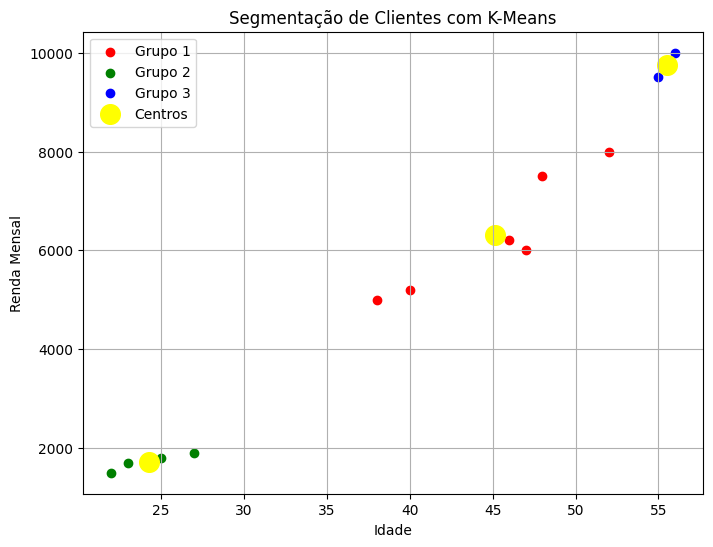

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Criando um DataFrame com dados fictícios de clientes
dados = pd.DataFrame({
    'Idade': [22, 25, 47, 52, 46, 56, 23, 27, 48, 55, 38, 40],
    'Renda': [1500, 1800, 6000, 8000, 6200, 10000, 1700, 1900, 7500, 9500, 5000, 5200]
})

# Aplicando K-Means com 3 grupos (K = 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dados)

# Adicionando o rótulo do grupo (cluster) a cada cliente
dados['Grupo'] = kmeans.labels_

# Visualizando os grupos
cores = ['red', 'green', 'blue']
plt.figure(figsize=(8, 6))
for i in range(3):
    grupo = dados[dados['Grupo'] == i]
    plt.scatter(grupo['Idade'], grupo['Renda'], label=f'Grupo {i+1}', color=cores[i])

# Adicionando os centros dos clusters
centros = kmeans.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], s=200, c='yellow', label='Centros')
plt.xlabel('Idade')
plt.ylabel('Renda Mensal')
plt.title('Segmentação de Clientes com K-Means')
plt.legend()
plt.grid(True)
plt.show()

# Entendendo visualmente a quantidade ideal de clusters (K)

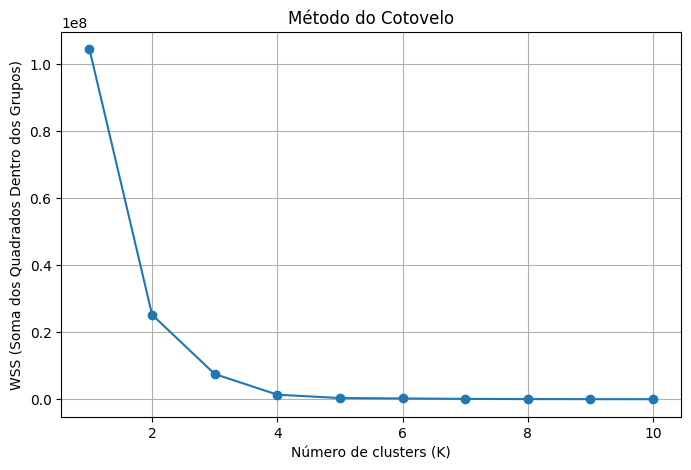

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Dados fictícios de clientes
dados = pd.DataFrame({
    'Idade': [22, 25, 47, 52, 46, 56, 23, 27, 48, 55, 38, 40],
    'Renda': [1500, 1800, 6000, 8000, 6200, 10000, 1700, 1900, 7500, 9500, 5000, 5200]
})

# --- Etapa 1: Método do Cotovelo ---
wss = []  # Lista para armazenar o WSS para cada valor de K

# Testando de K=1 a K=10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados)
    wss.append(kmeans.inertia_)  # WSS = inertia_

# Plot do gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters (K)')
plt.ylabel('WSS (Soma dos Quadrados Dentro dos Grupos)')
plt.grid(True)
plt.show()

In [ ]:
pip install kneed

Número ideal de clusters (K): 3


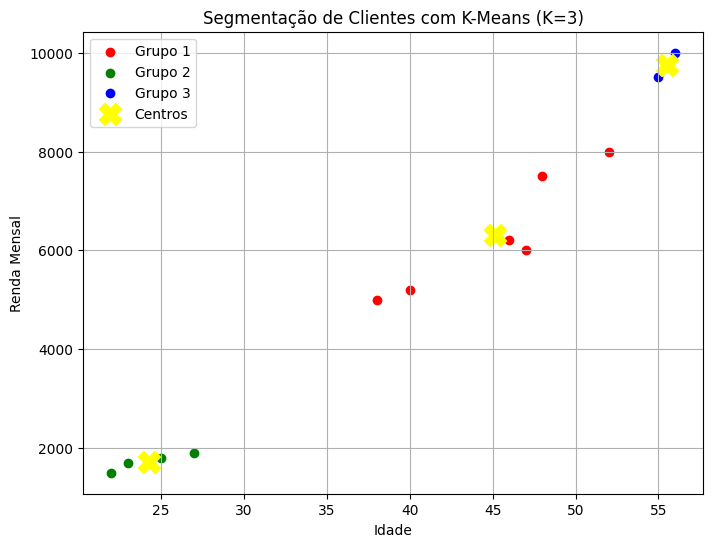

Silhouette Score: 0.68


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Dados fictícios de clientes
dados = pd.DataFrame({
    'Idade': [22, 25, 47, 52, 46, 56, 23, 27, 48, 55, 38, 40],
    'Renda': [1500, 1800, 6000, 8000, 6200, 10000, 1700, 1900, 7500, 9500, 5000, 5200]
})

# --- Etapa 1: Método do Cotovelo ---
wss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados)
    wss.append(kmeans.inertia_)

# Encontrando automaticamente o "cotovelo"
kl = KneeLocator(K_range, wss, curve='convex', direction='decreasing')
k_ideal = kl.elbow
print(f'Número ideal de clusters (K): {k_ideal}')

# --- Etapa 2: Aplicando KMeans com o K ideal ---
kmeans_final = KMeans(n_clusters=k_ideal, random_state=42)
dados['Grupo'] = kmeans_final.fit_predict(dados)

# --- Etapa 3: Visualizando os grupos ---
plt.figure(figsize=(8, 6))
cores = ['red', 'green', 'blue', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'pink', 'gray']

for i in range(k_ideal):
    grupo = dados[dados['Grupo'] == i]
    plt.scatter(grupo['Idade'], grupo['Renda'], label=f'Grupo {i+1}', color=cores[i])

# Centros dos clusters
centros = kmeans_final.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], s=250, c='yellow', marker='X', label='Centros')

plt.xlabel('Idade')
plt.ylabel('Renda Mensal')
plt.title(f'Segmentação de Clientes com K-Means (K={k_ideal})')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import silhouette_score

score = silhouette_score(dados, kmeans_final.labels_)
print(f"Silhouette Score: {score:.2f}")

In [ ]:
'''
Silhouette Score (Coeficiente de Silhueta)
Mede o quão bem cada ponto está no seu cluster em comparação com os clusters
vizinhos.

Varia de -1 a 1:

🟢 Perto de 1 → ponto bem agrupado.

🟡 Perto de 0 → ponto na fronteira entre clusters.

🔴 Negativo → ponto pode estar no cluster errado.

'''

In [ ]:
'''
Tema do Projeto: Segmentação de Clientes com K-Means
Base de Dados:
Usaremos a base "Mall Customers", com dados de clientes de um shopping center. Ela contém:

CustomerID

Gender

Age

Annual Income (k$)

Spending Score (1-100)

Link direto para o dataset:
'https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv'
'''

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.drop(["CustomerID"], axis = 1, inplace=True)

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

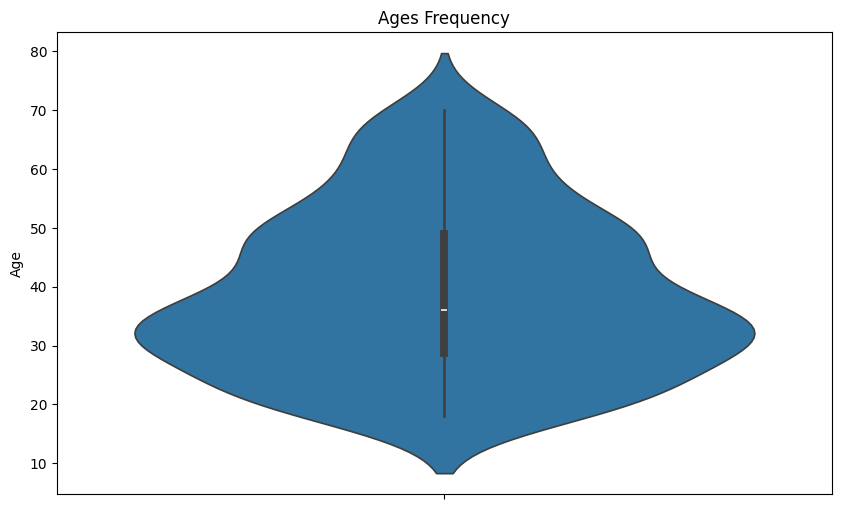

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

Número ideal de clusters (K): 4


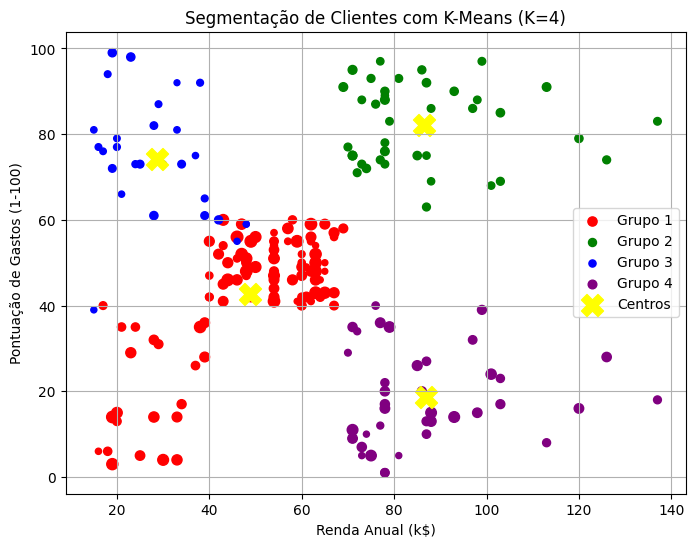


 Silhouette Score: 0.41


In [ ]:
# --- Etapa 1: Método do Cotovelo ---
wss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Providing the data for the KMeans algorithm to fit
    kmeans.fit(df[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']])
    wss.append(kmeans.inertia_)

# Encontrando automaticamente o "cotovelo"
kl = KneeLocator(K_range, wss, curve='convex', direction='decreasing')
k_ideal = kl.elbow
print(f'Número ideal de clusters (K): {k_ideal}')

# --- Etapa 2: Aplicando KMeans com o K ideal ---
kmeans_final = KMeans(n_clusters=k_ideal, random_state=42)
# Providing the data for prediction as well
df['Grupo'] = kmeans_final.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])


# --- Etapa 3: Visualizando os grupos ---
plt.figure(figsize=(8, 6))
cores = ['red', 'green', 'blue', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'pink', 'gray']

for i in range(k_ideal):
    grupo = df[df['Grupo'] == i]
    plt.scatter(grupo['Annual Income (k$)'], grupo['Spending Score (1-100)'],grupo ['Age'], label=f'Grupo {i+1}', color=cores[i]) # Use the clustering features for visualization

# Centros dos clusters
centros = kmeans_final.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], s=250, c='yellow', marker='X', label='Centros')

plt.xlabel('Renda Anual (k$)') # eixo X
plt.ylabel('Pontuação de Gastos (1-100)') #eixo y
plt.title(f'Segmentação de Clientes com K-Means (K={k_ideal})')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import silhouette_score

score = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age' ]], kmeans_final.labels_)
print(f"\n Silhouette Score: {score:.2f}")

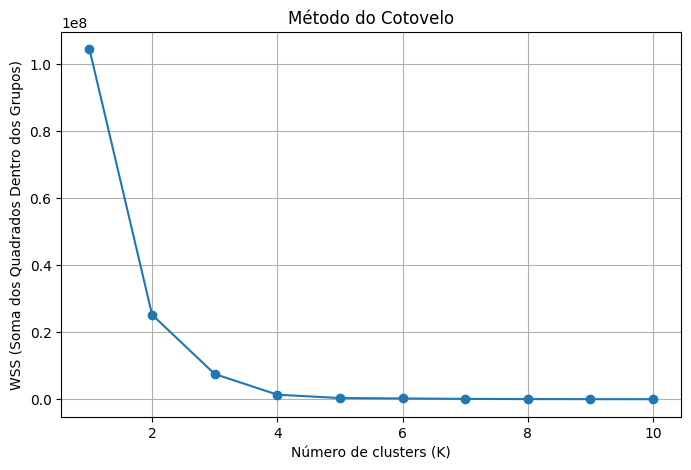

In [ ]:
# --- Etapa 1: Método do Cotovelo ---
wss = []  # Lista para armazenar o WSS para cada valor de K

# Testando de K=1 a K=10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados)
    wss.append(kmeans.inertia_)  # WSS = inertia_

# Plot do gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters (K)')
plt.ylabel('WSS (Soma dos Quadrados Dentro dos Grupos)')
plt.grid(True)
plt.show()